In [1]:
import tensorflow as tf


In [2]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

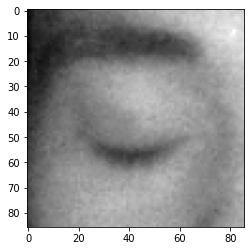

In [3]:
Datadirectory =  "Training_Dataset/"
Classes = ['Closed_Eyes','Open_Eyes']
count = 0
for cat in Classes:
    path = os.path.join(Datadirectory,cat)
    for img in os.listdir(path):
        if count == 5100:
            break
        count+=1
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        backtorgb = cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

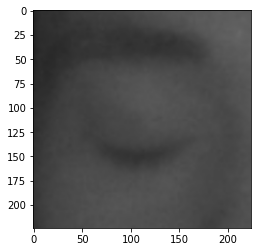

In [4]:
img_size = 224

new_array = cv.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [5]:
training_data = []
def create_training_Data () :
    for cat in Classes:
        path = os.path.join(Datadirectory,cat)
        class_num = Classes.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
                backtorgb = cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
                new_array = cv.resize(backtorgb, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [6]:
create_training_Data()

In [15]:
print(len(training_data))
training_data = training_data[:3000]

5000


In [16]:
import random
random.shuffle(training_data)

In [17]:
X = []
Y = []
for features,label in training_data :
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3)
X = X/255.0
Y = np.array(Y)

In [10]:
print(X.shape)

(5000, 224, 224, 3)


In [3]:
import pickle

In [14]:
pickle_out = open("x.pickle",'wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

In [15]:
pickle_in = open('x.pickle','rb')
x = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [19]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

new_model = keras.Model(inputs = base_input , outputs = final_output)
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [21]:
X = X[:1500]
Y = Y[:1500]

In [ ]:
new_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
new_model.fit(X,Y,epochs=8,validation_split= 0.1 )

: 

In [ ]:
new_model.save('my_model.h5')

: 

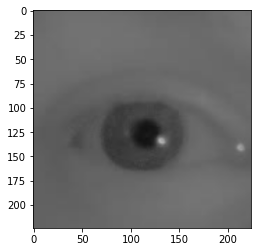

In [8]:
img_array = cv.imread('s0031_00266_1_0_1_1_1_02.png',cv.IMREAD_GRAYSCALE)
backtorgb = cv.cvtColor(img_array,cv.COLOR_GRAY2RGB)
new_array = cv.resize(backtorgb,(img_size,img_size))

X_input = np.array(new_array).reshape(1,img_size,img_size,3)

X_input.shape

plt.imshow(new_array)

X_input = X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)
prediction

In [10]:
faceCascade = cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_eye.xml')

print(faceCascade.empty())

False


In [ ]:
path = 'haarscascade_frontalface_default.xml'

cap = cv.VideoCapture(1)
if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open webcam')

while True:
    ret,frame = cap.read()
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]
    
    final_image = cv.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)

    Predictions = new_model.predict(final_image)

    if (Predictions > 0): status = "Open eyes"
    else: status = "Closed eyes"

    gray =cv.cvtColor(frame,cv.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for (x,y,w,h) in faces:
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    font = cv.FONT_HERSHEY_COMPLEX_SMALL

    cv.putText(frame,status,(50,50),font,3,(0,0,255),2,cv.LINE_4)

    cv.imshow("Drowesiness Detection",frame)

    if cv.waitKey(2) & 0xFF == ord('q'):
        break

    cap.release()
    cv.destroyAllWindows()

In [11]:
import winsound
frequency = 2500
duration = 1000

In [ ]:
path = 'haarscascade_frontalface_default.xml'

cap = cv.VideoCapture(1)
if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open webcam')

counter = 0
while True:
    ret,frame = cap.read()
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]
    
    final_image = cv.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)

    Predictions = new_model.predict(final_image)

    if (Predictions > 0): 
        status = "Open eyes"
        cv.putText(frame,status,(150,150),font,3,(255,0,0),2,cv.LINE_4)

        x1,y1,w1,h1 = 0,0,175,75

        cv.rectangle(frame,(x1,y1),(x1,+w1,y1+h1),(0,0,0),-1)
        cv.putText(frame,'Active',(x1+int(w1/10),y1+int(h1/2)),cv.FONT_HERSHEY_COMPLEX,0.7,(255,0,0),2)
        
    else: 
        counter = counter + 1
        status = "Closed eyes"
        cv.putText(frame,status,(150,150),font,2,(0,0,255),2,cv.LINE_4)
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)

        if counter > 5:
            x1 , y1 , w1 , h1 = 0 , 0 , 175 , 75
            cv.rectangle(frame , (x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv.putText(frame,"Sleep Slert!!",(x1 + int(w1/10),y1+int(h1/2)),cv.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            counter = 0



    # gray =cv.cvtColor(frame,cv.COLOR_BGR2GRAY)

    # faces = faceCascade.detectMultiScale(gray,1.1,4)

    # for (x,y,w,h) in faces:
    #     cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    # font = cv.FONT_HERSHEY_COMPLEX_SMALL

    # cv.putText(frame,status,(50,50),font,3,(0,0,255),2,cv.LINE_4)

    cv.imshow("Drowesiness Detection",frame)

    if cv.waitKey(2) & 0xFF == ord('q'):
        break

    cap.release()
    cv.destroyAllWindows()